In [ ]:
from sklearn.datasets import load_iris
iris = load_iris ()

In [ ]:
print (iris.keys())



dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [ ]:
print (iris ["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
print (iris ["target_names"])

['setosa' 'versicolor' 'virginica']


In [ ]:
print (iris ["feature_names"]) #Nitelikler (Feauters)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
print (iris['data'].shape)

(150, 4)


In [ ]:
print (iris['data'][:5]) # İlk 5 Çiçek İçin

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [ ]:
print (iris['target']) # 0 setosa 1 versicolour ve 2 virginica 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
#Veri Setini Parçalama (Training- Eğitim ve Test Verisi)--- Train test split i tanıyalım.. 

from sklearn.model_selection import  train_test_split


In [ ]:
x_egitim, x_test, y_egitim, y_test = train_test_split (iris['data'],iris['target'], random_state=0 )

In [ ]:
print (x_egitim.shape)
print (y_egitim.shape)

(112, 4)
(112,)


In [ ]:
print (x_test.shape)
print (y_test.shape)

(38, 4)
(38,)


In [ ]:
# Veri Ön İnceleme Kısmı (Görselleştirme)

import pandas as pd 

In [ ]:
iris_df = pd.DataFrame(x_egitim, columns=iris.feature_names)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0a1fb8e050>,
      dtype=object)

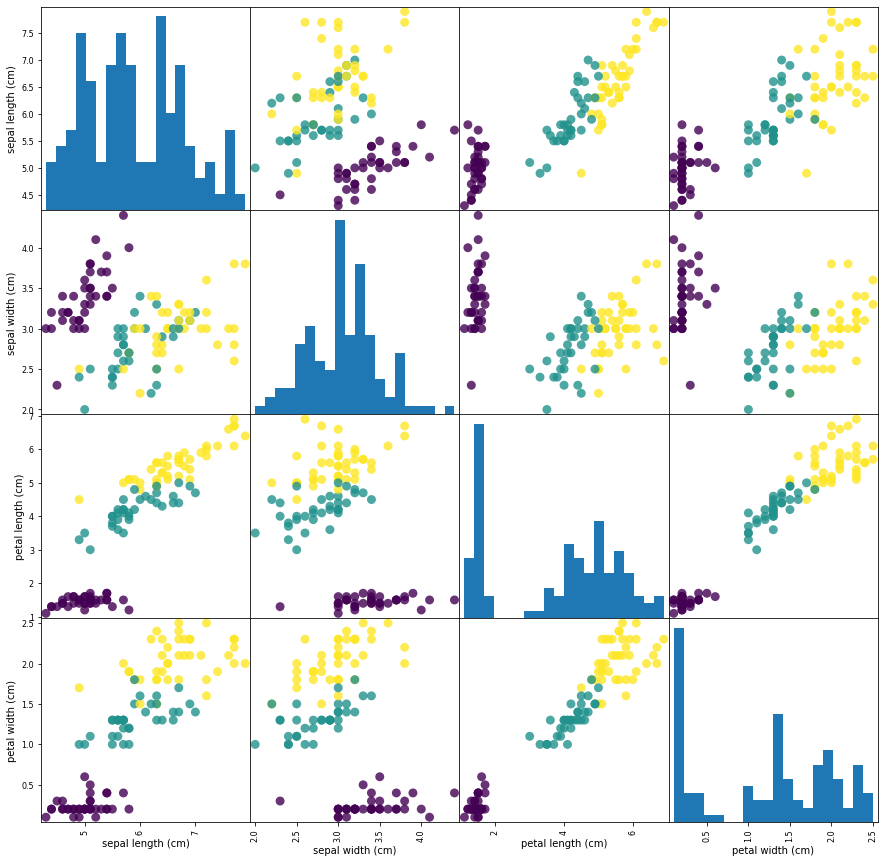

In [ ]:
from pandas.plotting import scatter_matrix
%matplotlib inline 
scatter_matrix (iris_df, c=y_egitim, figsize=(15,15), marker="o", hist_kwds={'bins':20}, s= 80, alpha=0.8) #Saçılım Matrisinin işlemleri 

#Kdws tarafı histogram dikdörtgenlerinin boyutlandırılması 

In [ ]:
#Modeli Kuralım - Model sadece Training verisinden oluşur. 

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_egitim,y_egitim)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
import numpy as np  
x_yeni = np.array([[7,3.1,3,0.6]])
x_yeni.shape

(1, 4)

In [ ]:
tahmin = knn.predict(x_yeni)
print ("Tahmin Sınıfı:", tahmin)
print ("Tahmin Türü:", iris["target_names"][tahmin])      

Tahmin Sınıfı: [1]
Tahmin Türü: ['versicolor']


In [ ]:
#Şimdi Modelin Performansına Bakalım 

y_tahmin = knn.predict(x_test)
print (y_tahmin)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [ ]:
#Gerçek Datalarla Karşılaştıralım 

print(np.mean (y_tahmin == y_test))

#print (knn.score (x_test,y_test))

0.9736842105263158
0.9736842105263158
